<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Time_Series_using_Facebook_Prophet_(Univariate_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NYC_ED.csv to NYC_ED.csv


In [3]:
df1 = pd.read_csv('NYC_ED.csv')

In [4]:
df1.head()

,TimeStamp,Demand,Preciptation,Temperature
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TimeStamp     49205 non-null  object 
 1   Demand        49124 non-null  float64
 2   Preciptation  48975 non-null  float64
 3   Temperature   49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df1['TimeStamp'] = pd.to_datetime(df1.TimeStamp)
df1.dtypes

TimeStamp       datetime64[ns]
Demand                 float64
Preciptation           float64
Temperature            float64
dtype: object

In [7]:
figure = px.line(df1, x='TimeStamp', y='Demand', title='NYED')

figure.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="3y", step="year", stepmode="todate"),
            dict(count=3, label="5y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
figure.show()

In [8]:
df1= df1.set_index('TimeStamp')

In [9]:
df1.head()

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


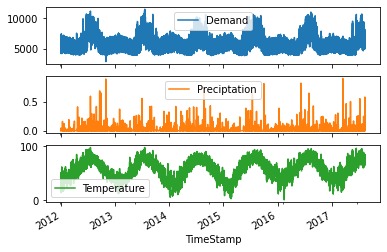

In [10]:
df1.plot(subplots=True);

In [11]:
df1.shape

(49205, 3)

In [12]:
df1.isnull().sum()

Demand           81
Preciptation    230
Temperature     186
dtype: int64

In [13]:
df1.query('Demand != Demand')

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-03-11 02:00:00,NaN,0.0000,37.78
2013-03-10 02:00:00,NaN,0.0000,38.18
2014-03-09 02:00:00,NaN,0.0000,40.86
2015-03-08 02:00:00,NaN,0.0000,36.96
2015-03-11 11:00:00,NaN,0.0000,49.95
2015-10-04 11:00:00,NaN,0.0000,55.50
2015-10-04 12:00:00,NaN,0.0000,57.24
2016-01-28 20:00:00,NaN,0.0000,36.62
2016-01-28 21:00:00,NaN,0.0000,39.05


In [14]:
daily_level = df1.resample('D').mean()

In [15]:
daily_level.head()

,Demand,Preciptation,Temperature
TimeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500


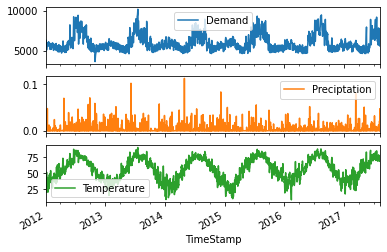

In [16]:
daily_level.plot(subplots=True);

In [17]:
daily1 = df1.resample('D').mean()

In [18]:
daily1.columns

Index(['Demand', 'Preciptation', 'Temperature'], dtype='object')

In [19]:
#using Facebook Prophet
from fbprophet import Prophet

In [20]:
daily1_fb_format = daily1.reset_index()[['TimeStamp','Demand']].rename({'TimeStamp':'ds','Demand':'y'}, axis='columns')

In [21]:
daily1_fb_format.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [22]:
#splitting the data

train =  daily1_fb_format[(daily1_fb_format['ds'] >= '2012-01-01') & (daily1_fb_format['ds'] <= '2017-04-30')]
test =  daily1_fb_format[(daily1_fb_format['ds'] > '2017-04-30')]

In [23]:
train.shape

(1947, 2)

In [24]:
test.shape

(104, 2)

In [25]:
model = Prophet(interval_width=0.95)

In [26]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#creates a linear model 
model.params

{'beta': array([[-0.03474564, -0.07051982,  0.05760445,  0.04706222, -0.01404777,
         -0.00499591, -0.00387932, -0.00073284,  0.00241073, -0.00756147,
          0.00404936,  0.00483016, -0.00789882, -0.00470511,  0.00701484,
         -0.00268429, -0.00128001,  0.00170179,  0.00035188, -0.0002186 ,
         -0.02824661,  0.02385118,  0.0206227 ,  0.00054777, -0.00494972,
         -0.00501049]]),
 'delta': array([[-3.50360674e-09, -1.32489168e-02, -7.74174578e-02,
          2.56670913e-08,  8.81258464e-08, -1.46805043e-08,
          1.70635442e-08, -2.64450633e-08, -5.82121639e-08,
          5.89599724e-08, -5.16647027e-02, -5.73312969e-02,
         -5.10303343e-05,  3.64173165e-08,  2.05843529e-01,
          5.29272199e-02, -1.73045352e-07, -8.36841050e-02,
         -7.56589140e-02,  3.12992747e-08, -2.32275699e-08,
          1.07689546e-08,  2.03120136e-02,  2.96291061e-03,
          2.74957150e-08]]),
 'k': array([[0.08260908]]),
 'm': array([[0.5937986]]),
 'sigma_obs': array([[

In [28]:
future_values = model.make_future_dataframe(periods=104)

In [29]:
future_values.head()

,ds
0,2012-01-01
1,2012-01-02
2,2012-01-03
3,2012-01-04
4,2012-01-05


In [30]:
forecast_values = model.predict(future_values)

In [31]:
forecast_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,6034.940960,4244.602366,6021.177707,6034.940960,6034.940960,-929.934617,-929.934617,-929.934617,-541.068072,-541.068072,-541.068072,-388.866544,-388.866544,-388.866544,0.0,0.0,0.0,5105.006343
1,2012-01-02,6035.372399,4967.207436,6702.553408,6035.372399,6035.372399,-245.909743,-245.909743,-245.909743,133.872072,133.872072,133.872072,-379.781815,-379.781815,-379.781815,0.0,0.0,0.0,5789.462656
2,2012-01-03,6035.803837,5016.657811,6859.250155,6035.803837,6035.803837,-129.225376,-129.225376,-129.225376,240.783556,240.783556,240.783556,-370.008933,-370.008933,-370.008933,0.0,0.0,0.0,5906.578461
3,2012-01-04,6036.235275,4979.917901,6781.180631,6036.235275,6036.235275,-121.910180,-121.910180,-121.910180,237.713222,237.713222,237.713222,-359.623402,-359.623402,-359.623402,0.0,0.0,0.0,5914.325096
4,2012-01-05,6036.666714,5025.255898,6778.271700,6036.666714,6036.666714,-151.658496,-151.658496,-151.658496,197.050426,197.050426,197.050426,-348.708921,-348.708921,-348.708921,0.0,0.0,0.0,5885.008218


In [32]:
new = forecast_values[['ds','yhat','yhat_lower','yhat_upper']].tail()

In [33]:
new

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7592.967315,6661.834898,8492.206509
2047,2017-08-09,7582.126815,6699.351503,8476.710405
2048,2017-08-10,7536.891048,6635.845573,8444.455493
2049,2017-08-11,7492.155420,6605.424629,8363.493637
2050,2017-08-12,6917.407396,6010.508197,7851.253908


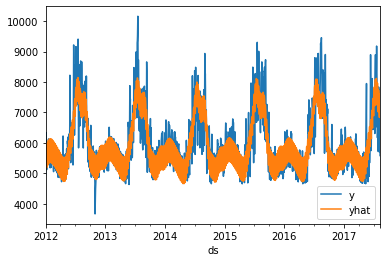

In [34]:
pd.concat([daily1_fb_format.set_index('ds')['y'],forecast_values.set_index('ds')['yhat']],axis=1).plot();

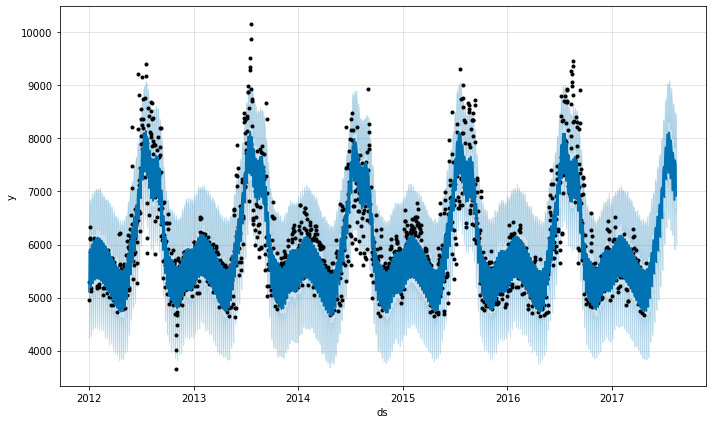

In [35]:
fig1 = model.plot(forecast_values)

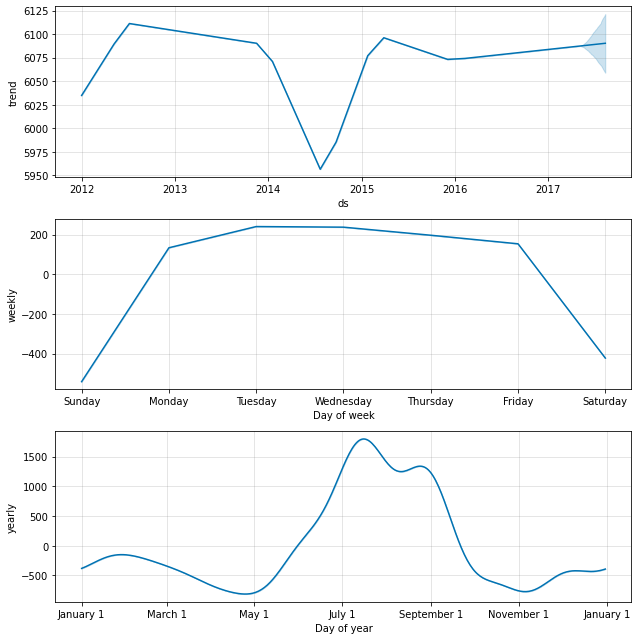

In [36]:
figure2 = model.plot_components(forecast_values)

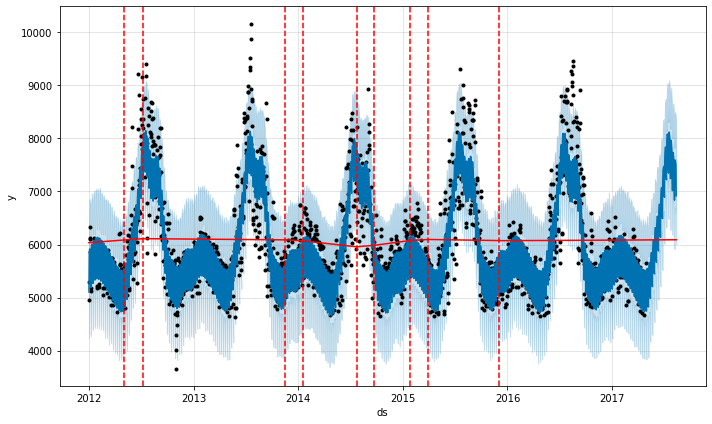

In [48]:
from fbprophet.plot import add_changepoints_to_plot
figure = model.plot(forecast_values)
cp = add_changepoints_to_plot(figure.gca(), model, forecast_values);

In [46]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

In [49]:
from fbprophet.plot import plot_plotly

import plotly.offline as py

figure5 =plot_plotly(model,forecast_values)
py.iplot(figure5)

In [51]:
from fbprophet.diagnostics import cross_validation

cv1=cross_validation(model=model,initial ='700 days', horizon ='350 days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2013-12-22 00:00:00 and 2016-05-15 00:00:00


In [52]:
cv1.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-12-23,5979.356347,5145.487388,6850.013488,5721.995833,2013-12-22
1,2013-12-24,6049.783681,5234.873567,6934.461546,5578.833333,2013-12-22
2,2013-12-25,6093.858042,5217.686242,6979.577450,5325.700000,2013-12-22
3,2013-12-26,6095.755513,5229.473409,6961.116511,5859.683333,2013-12-22
4,2013-12-27,6073.719606,5246.202423,6945.779116,5785.250000,2013-12-22


In [53]:
from fbprophet.diagnostics import performance_metrics
pm = performance_metrics(cv1)
pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,445472.977009,667.437620,514.063565,0.084327,0.066688,0.823810
1,36 days,450045.752955,670.854495,517.408656,0.084605,0.066829,0.814286
2,37 days,442631.094679,665.305264,511.399645,0.083357,0.064035,0.819048
3,38 days,425236.372765,652.101505,499.005079,0.081238,0.062387,0.828571
4,39 days,418681.442494,647.055981,493.164870,0.079850,0.061245,0.833333
5,40 days,422890.976212,650.300681,495.517506,0.079918,0.061845,0.828571
6,41 days,426544.355747,653.103633,497.290230,0.079831,0.060854,0.823810
7,42 days,423636.701350,650.873798,493.971279,0.078907,0.059260,0.828571
8,43 days,422843.311069,650.264032,491.058628,0.078301,0.059260,0.828571
9,44 days,428670.214338,654.729115,496.339855,0.078942,0.059802,0.823810
